# PyERM Usage Example (Clustering)

In [1]:
# import the necessary packages
import pyerm
from PIL import Image
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

In [5]:
def demo_experiment(exp: pyerm.Experiment):
    # task init
    exp.task_init("Clustering")

    # data generation & init
    dataset_params = {
        "n_samples_one_type": 100,
        "mean1": np.random.rand(2),
        "cov1": np.random.rand(2, 2),
        "mean2": np.random.rand(2),
        "cov2": np.random.rand(2, 2),
        "mean3": np.random.rand(2),
        "cov3": np.random.rand(2, 2),
    }
    data_id = exp.data_init("2D Gaussian Data", dataset_params)
    print(f"data_id: {data_id}")

    # method init
    method_params = {
        'n_clusters': 3,
        'random_state': np.random.randint(100),
    }
    method_id = exp.method_init("KMeans", method_params)
    print(f"method_id: {method_id}")

    # data generation & processing
    data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
    data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
    data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
    X = np.vstack((data1, data2, data3))
    y_true = np.array([0]*100 + [1]*100 + [2]*100)
    indices = np.random.permutation(len(X))
    X = X[indices]
    y_true = y_true[indices]

    # method execution
    kmeans = KMeans(**method_params)
    exp.experiment_start(f"This is the {exp.run_times+1}th experiment", tags=['demo', 'test'], experimenters=['Alice', 'Bob'])
    y_pred = kmeans.fit_predict(X)

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Clustering accuracy: {accuracy:.2f}')

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    ax.set_title('KMeans Clustering of 2D Gaussian Data')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)

    image = Image.open(buf)

    # experiment over and result saving
    rst_dict = {
        'accuracy': accuracy,
    }
    img_dict = {
        f'clustering_result_{exp.run_times+1}': image,
    }
    exp.experiment_over(rst_dict, img_dict)



Table experiment_list already exists
Table data_2D_Gaussian_Data already exists
{'n_samples_one_type': 100, 'mean1': '[0.69742027 0.29734901]', 'cov1': '[[0.9243962  0.97105825]\n [0.94426649 0.47421422]]', 'mean2': '[0.86204265 0.8445494 ]', 'cov2': '[[0.31910047 0.82891547]\n [0.03700763 0.59626988]]', 'mean3': '[0.23000884 0.12056689]', 'cov3': '[[0.0769532  0.69628878]\n [0.33987496 0.72476677]]'}
data_id: 2
Table method_KMeans already exists
{'n_clusters': 3, 'random_state': 38}
method_id: 2
Clustering accuracy: 0.00
Table result_Clustering already exists
<class 'str'>
<class 'bytes'>
Table data_2D_Gaussian_Data already exists
{'n_samples_one_type': 100, 'mean1': '[0.49448113 0.97955084]', 'cov1': '[[0.14496507 0.72515573]\n [0.1911907  0.33826311]]', 'mean2': '[0.30869874 0.94703599]', 'cov2': '[[0.96735618 0.18301544]\n [0.02203516 0.72000804]]', 'mean3': '[0.41798993 0.08884025]', 'cov3': '[[0.68375411 0.54510553]\n [0.98051682 0.2274095 ]]'}
data_id: 3
Table method_KMeans alre

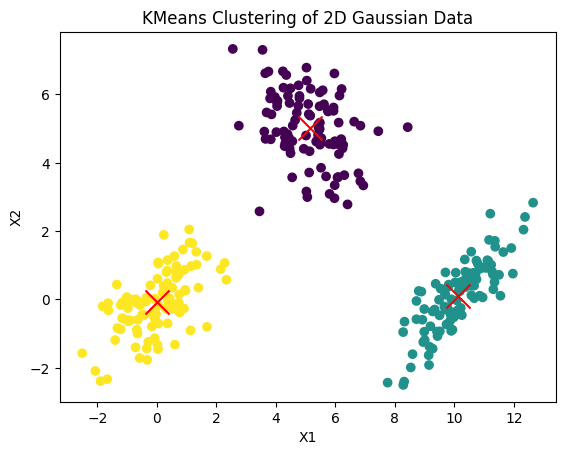

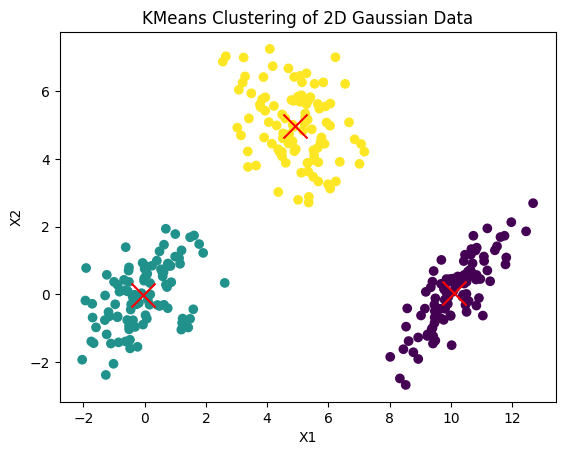

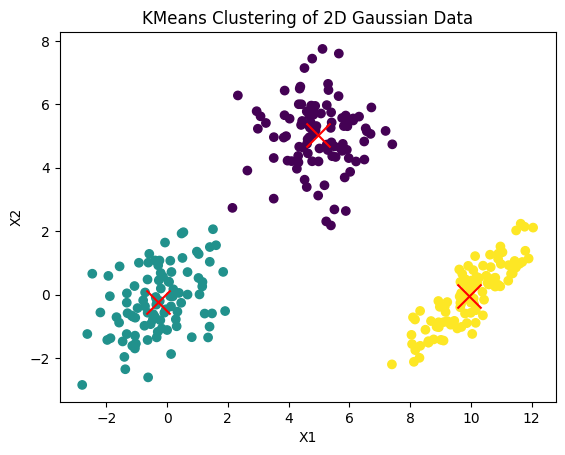

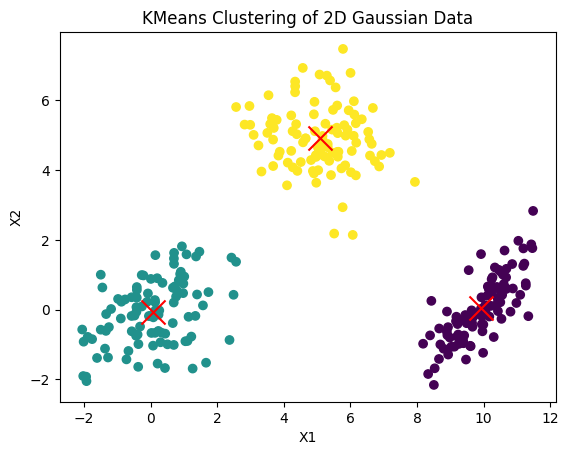

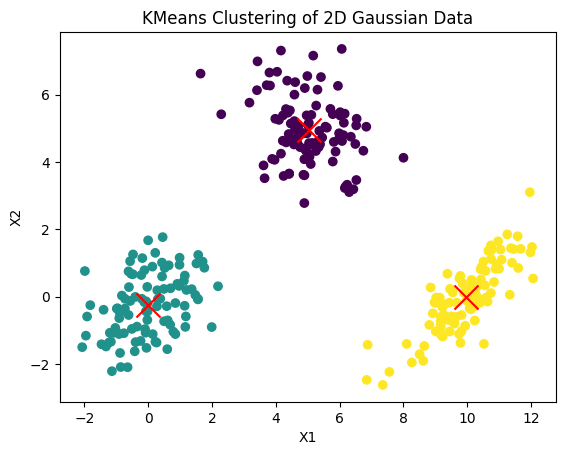

In [6]:
# hyperparameters for the experiment

# the default path is '~/experiments.db'
exp = pyerm.Experiment()
for i in range(5):
    demo_experiment(exp)


In [7]:
!pyerm_webui